# Customer Segmentation using K-Means Clustering
This notebook demonstrates how to apply clustering on customer purchase behavior using synthetic data based on the AdventureWorks data warehouse.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

sns.set(style="whitegrid")

In [2]:
# Load dataset
df = pd.read_csv("customer_segmentation.csv")
df.head()

,CustomerID,TotalSpend,NumOrders,AvgOrderValue,RecencyDays,Region
0,1,1196.84,4,299.21,212,North America
1,2,747.23,1,747.23,263,Pacific
2,3,691.14,1,691.14,312,South America
3,4,691.15,1,691.15,80,North America
4,5,2324.86,7,332.12,165,Europe


In [3]:
# Encode categorical data
df_encoded = pd.get_dummies(df, columns=['Region'], drop_first=True)

# Standardize numerical features
features = ['TotalSpend', 'NumOrders', 'AvgOrderValue', 'RecencyDays'] + [col for col in df_encoded.columns if col.startswith('Region_')]
X = df_encoded[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

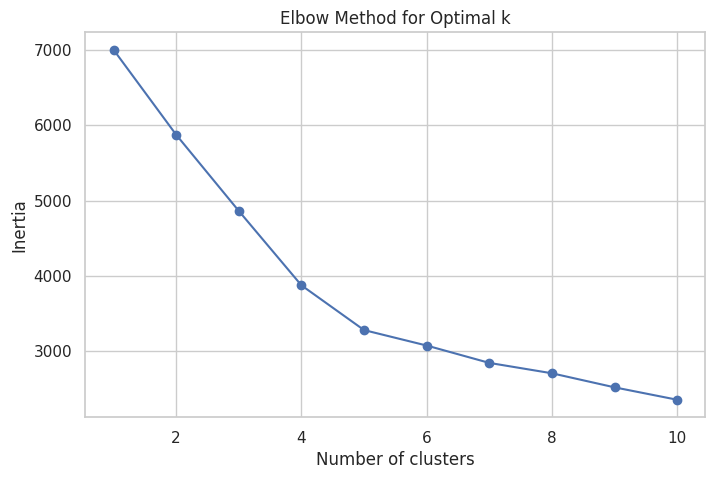

In [4]:
# Elbow method to find optimal k
inertia = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

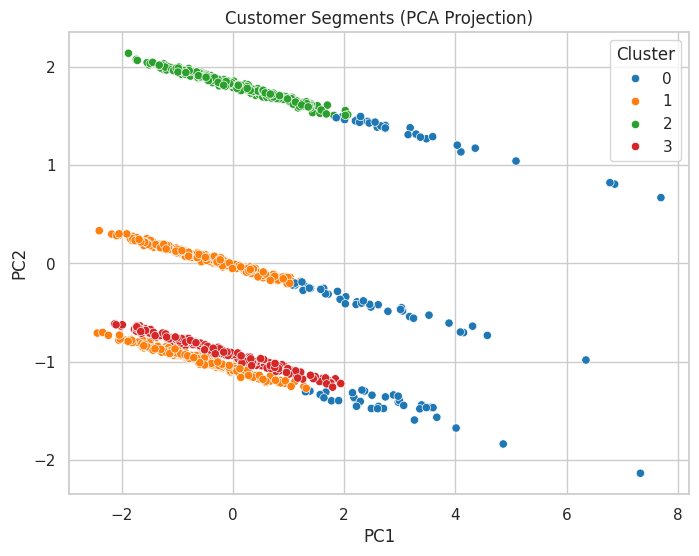

In [5]:
# Fit KMeans with k=4 (example)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

# PCA for 2D visualization
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df['PC1'] = components[:, 0]
df['PC2'] = components[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='tab10')
plt.title('Customer Segments (PCA Projection)')
plt.show()

In [6]:
# Analyze cluster characteristics
df.groupby('Cluster')[['TotalSpend', 'NumOrders', 'AvgOrderValue', 'RecencyDays']].mean().round(2)

,TotalSpend,NumOrders,AvgOrderValue,RecencyDays
Cluster,,,,
0,2201.69,3.07,857.34,195.59
1,837.74,5.21,183.97,169.98
2,924.80,5.12,206.93,180.41
3,952.50,5.05,214.15,184.77
